In [79]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
from sklearn import cross_validation, preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from patsy import dmatrices

In [81]:
import scipy.stats 
import random

In [82]:
import plotly.plotly as py
import plotly.graph_objs as go
%matplotlib inline

ModuleNotFoundError: No module named 'plotly'

In [83]:
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [84]:
df = pd.read_csv("germancredit.csv")
Data = pd.read_csv("germancredit.csv")
print(Data.columns)
#

Index(['Creditability', 'AcctBalance', 'DurCredit', 'Paymnt Status', 'Purpose',
       'CreditAmt', 'Value', 'LengthEmpl', 'Instalment', 'SexMS', 'Guarantors',
       'DurAdd', 'MVAA', 'Age', 'ConcurrentCredits', 'Apt', 'NoCredit',
       'Occupation', 'NoDep', 'Telephone', 'ForeignWorker'],
      dtype='object')


In [85]:
print("Number of observations: ", len(Data))
Data.head()


Number of observations:  1000


,Creditability,AcctBalance,DurCredit,Paymnt Status,Purpose,CreditAmt,Value,LengthEmpl,Instalment,SexMS,...,DurAdd,MVAA,Age,ConcurrentCredits,Apt,NoCredit,Occupation,NoDep,Telephone,ForeignWorker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [86]:
plt.plot(Data.CreditAmt, Data.Creditability, 'o', color='darkblue');

In [87]:
#Data.hist("CreditAmt",figsize=(10,4))
#plt.show()

plt.hist(Data["CreditAmt"], bins = 20)
plt.xlabel("Credit Amount")
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

In [88]:
b = np.array([0, 10, 20 ,30, 40, 50, 60, 70, 80])
b

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80])

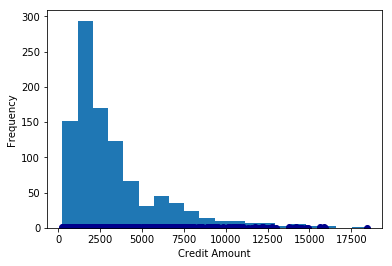

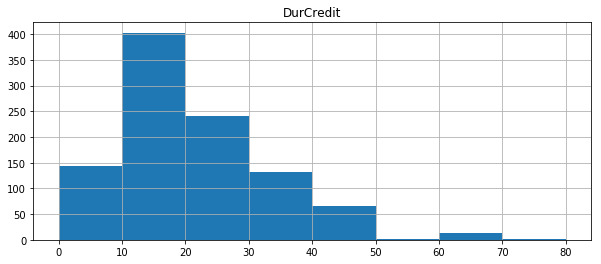

In [89]:
Data.hist("DurCredit",figsize=(10,4),bins = b)
plt.show()

In [90]:
cutpoint = np.array([0, 500, 1000,1500,2000, 2500, 5000, 7500, 10000, 15000, 20000])
cutpoint

array([    0,   500,  1000,  1500,  2000,  2500,  5000,  7500, 10000,
       15000, 20000])

In [91]:
Data['Credit_cat'] = pd.cut(Data.CreditAmt, cutpoint)
Data['Credit_cat'].value_counts()

(2500, 5000]      275
(1000, 1500]      190
(1500, 2000]      126
(2000, 2500]      105
(5000, 7500]      102
(500, 1000]        98
(7500, 10000]      46
(10000, 15000]     35
(0, 500]           18
(15000, 20000]      5
Name: Credit_cat, dtype: int64

In [92]:
Credit_cat_value_count=Data['Credit_cat'].value_counts()
Credit_cat_value_count

(2500, 5000]      275
(1000, 1500]      190
(1500, 2000]      126
(2000, 2500]      105
(5000, 7500]      102
(500, 1000]        98
(7500, 10000]      46
(10000, 15000]     35
(0, 500]           18
(15000, 20000]      5
Name: Credit_cat, dtype: int64

In [93]:
Data.columns

Index(['Creditability', 'AcctBalance', 'DurCredit', 'Paymnt Status', 'Purpose',
       'CreditAmt', 'Value', 'LengthEmpl', 'Instalment', 'SexMS', 'Guarantors',
       'DurAdd', 'MVAA', 'Age', 'ConcurrentCredits', 'Apt', 'NoCredit',
       'Occupation', 'NoDep', 'Telephone', 'ForeignWorker', 'Credit_cat'],
      dtype='object')

In [127]:
#Data[Credit_cat][Creditability].value_counts()
Table1 = pd.crosstab(Data.Credit_cat, Data.Creditability, rownames = ['Credit_cat'], colnames = ['Creditability']);
Table1

Creditability,0,1
Credit_cat,,
"(0, 500]",3,15
"(500, 1000]",34,64
"(1000, 1500]",51,139
"(1500, 2000]",33,93
"(2000, 2500]",26,79
"(2500, 5000]",75,200
"(5000, 7500]",34,68
"(7500, 10000]",20,26
"(10000, 15000]",21,14


In [95]:
Table2 = Table1.apply(lambda r: r/r.sum(), axis=1)

In [96]:
Table2

Creditability,0,1
Credit_cat,,
"(0, 500]",0.166667,0.833333
"(500, 1000]",0.346939,0.653061
"(1000, 1500]",0.268421,0.731579
"(1500, 2000]",0.261905,0.738095
"(2000, 2500]",0.247619,0.752381
"(2500, 5000]",0.272727,0.727273
"(5000, 7500]",0.333333,0.666667
"(7500, 10000]",0.434783,0.565217
"(10000, 15000]",0.600000,0.400000


In [97]:
Table3 = pd.concat([Table2, Credit_cat_value_count], axis=1)
#Table3.columns = ['a','b']

In [98]:
round(Table3,2)

,0,1,Credit_cat
"(0, 500]",0.17,0.83,18
"(500, 1000]",0.35,0.65,98
"(1000, 1500]",0.27,0.73,190
"(1500, 2000]",0.26,0.74,126
"(2000, 2500]",0.25,0.75,105
"(2500, 5000]",0.27,0.73,275
"(5000, 7500]",0.33,0.67,102
"(7500, 10000]",0.43,0.57,46
"(10000, 15000]",0.60,0.40,35
"(15000, 20000]",0.60,0.40,5


In [99]:
odds = Table3[1]/(1-Table3[1])
odds

(0, 500]          5.000000
(500, 1000]       1.882353
(1000, 1500]      2.725490
(1500, 2000]      2.818182
(2000, 2500]      3.038462
(2500, 5000]      2.666667
(5000, 7500]      2.000000
(7500, 10000]     1.300000
(10000, 15000]    0.666667
(15000, 20000]    0.666667
Name: 1, dtype: float64

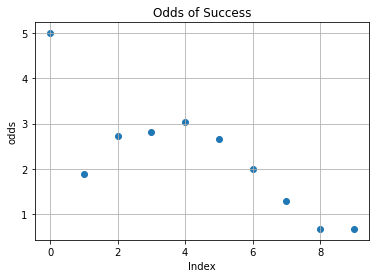

In [100]:
plt.scatter( np.arange(10),odds, marker='o')
plt.xlabel("Index")
plt.ylabel("odds")
plt.title("Odds of Success")
plt.grid(True)
plt.show()

In [101]:
lodds =np.log(odds)

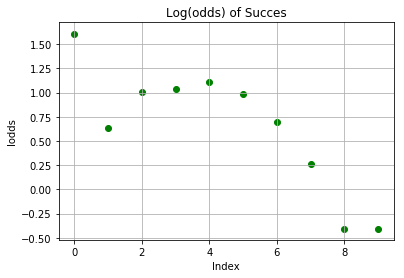

In [102]:
plt.scatter( np.arange(10),lodds, marker='o',color='g')
plt.xlabel("Index")
plt.ylabel("lodds")
plt.title("Log(odds) of Succes")
plt.grid(True)
plt.show()

In [123]:
fit1_logistic=sm.Logit(Data.Creditability,sm.add_constant(Data.CreditAmt)).fit()#.predict(test_X)
print(fit1_logistic.summary())

Optimization terminated successfully.
         Current function value: 0.599532
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          Creditability   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Thu, 01 Nov 2018   Pseudo R-squ.:                 0.01855
Time:                        11:48:43   Log-Likelihood:                -599.53
converged:                       True   LL-Null:                       -610.86
                                        LLR p-value:                 1.928e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2294      0.108     11.348      0.000       1.017       1.442
CreditAmt     -0.0001   2.36e

In [104]:
Data.columns

Index(['Creditability', 'AcctBalance', 'DurCredit', 'Paymnt Status', 'Purpose',
       'CreditAmt', 'Value', 'LengthEmpl', 'Instalment', 'SexMS', 'Guarantors',
       'DurAdd', 'MVAA', 'Age', 'ConcurrentCredits', 'Apt', 'NoCredit',
       'Occupation', 'NoDep', 'Telephone', 'ForeignWorker', 'Credit_cat'],
      dtype='object')

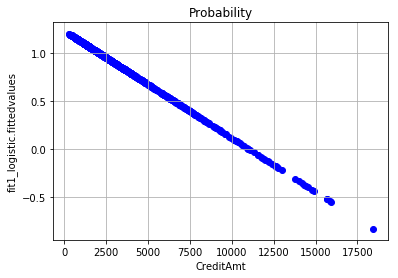

In [124]:
# Probability
#with(German_Credit, plot(CreditAmt, fit1.logistic$fitted.values, pch=19, cex=0.4, col="dark blue"))
x= Data.CreditAmt
y = fit1_logistic.fittedvalues
plt.scatter( x,y, marker='o',color='b')
plt.xlabel("CreditAmt")
plt.ylabel("fit1_logistic.fittedvalues")
plt.title("Probability")
plt.grid(True)
plt.show()

In [125]:
Data['Duration_cat'] = pd.cut(Data.DurCredit, b)
Data['Duration_cat'].value_counts()

(10, 20]    383
(20, 30]    273
(0, 10]     171
(30, 40]     92
(40, 50]     65
(50, 60]     15
(70, 80]      1
(60, 70]      0
Name: Duration_cat, dtype: int64

In [107]:
Duration_cat_value_count=Data['Duration_cat'].value_counts()
Duration_cat_value_count

(10, 20]    383
(20, 30]    273
(0, 10]     171
(30, 40]     92
(40, 50]     65
(50, 60]     15
(70, 80]      1
(60, 70]      0
Name: Duration_cat, dtype: int64

In [108]:
Data.columns

Index(['Creditability', 'AcctBalance', 'DurCredit', 'Paymnt Status', 'Purpose',
       'CreditAmt', 'Value', 'LengthEmpl', 'Instalment', 'SexMS', 'Guarantors',
       'DurAdd', 'MVAA', 'Age', 'ConcurrentCredits', 'Apt', 'NoCredit',
       'Occupation', 'NoDep', 'Telephone', 'ForeignWorker', 'Credit_cat',
       'Duration_cat'],
      dtype='object')

In [109]:
Table4 = pd.crosstab(Data.Duration_cat, Data.Creditability, rownames = ['Duration_cat'], colnames = ['Creditability']);
Table4

Creditability,0,1
Duration_cat,,
"(0, 10]",27,144
"(10, 20]",106,277
"(20, 30]",84,189
"(30, 40]",40,52
"(40, 50]",35,30
"(50, 60]",7,8
"(60, 70]",0,0
"(70, 80]",1,0


In [110]:
Table5 = Table4.apply(lambda r: r/r.sum(), axis=1)
Table5

Creditability,0,1
Duration_cat,,
"(0, 10]",0.157895,0.842105
"(10, 20]",0.276762,0.723238
"(20, 30]",0.307692,0.692308
"(30, 40]",0.434783,0.565217
"(40, 50]",0.538462,0.461538
"(50, 60]",0.466667,0.533333
"(60, 70]",NaN,NaN
"(70, 80]",1.000000,0.000000


In [126]:
fit2_logistic=sm.Logit(Data.Creditability,sm.add_constant(Data.DurCredit)).fit()#.predict(test_X)
print(fit2_logistic.summary())

Optimization terminated successfully.
         Current function value: 0.588557
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          Creditability   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Thu, 01 Nov 2018   Pseudo R-squ.:                 0.03652
Time:                        11:57:14   Log-Likelihood:                -588.56
converged:                       True   LL-Null:                       -610.86
                                        LLR p-value:                 2.399e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6664      0.147     11.365      0.000       1.379       1.954
DurCredit     -0.0375      0.

In [129]:
6 1.439
12 1.216
18 0.989


4.21
3.37
2.68

0.5414
0.3164
0.0914



1.7
1.37
1.095




1.216
0.6539
0.0914


3.37
1.92
1.04

X_temp=Data.iloc[:,[2,5]]





SyntaxError: invalid syntax (<ipython-input-129-ebfb297cfd6c>, line 1)

In [130]:

X_temp=Data.iloc[:,[2,5]]

In [132]:
fit3_logistic=sm.Logit(Data.Creditability, sm.add_constant(X_temp)).fit()
print(fit3_logistic.summary())

Optimization terminated successfully.
         Current function value: 0.588276
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          Creditability   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Thu, 01 Nov 2018   Pseudo R-squ.:                 0.03698
Time:                        13:29:17   Log-Likelihood:                -588.28
converged:                       True   LL-Null:                       -610.86
                                        LLR p-value:                 1.549e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6701      0.147     11.390      0.000       1.383       1.957
DurCredit     -0.0341      0.

In logistic regression results we will get z value 



In [113]:
df.columns


Index(['Creditability', 'AcctBalance', 'DurCredit', 'Paymnt Status', 'Purpose',
       'CreditAmt', 'Value', 'LengthEmpl', 'Instalment', 'SexMS', 'Guarantors',
       'DurAdd', 'MVAA', 'Age', 'ConcurrentCredits', 'Apt', 'NoCredit',
       'Occupation', 'NoDep', 'Telephone', 'ForeignWorker'],
      dtype='object')

In [ ]:
6 months 

1.44
4.22
0.809


12 months

1.24
3.464
0.776


24 months 
0.796
2.21
0.68

36 months 
0.216
1.24
0.55


In [114]:
features = Data[['AcctBalance',
 'Paymnt Status',
 'Purpose',
 'Value',
 'LengthEmpl',
 'MVAA',
 'ConcurrentCredits',
 'Apt',
 'CreditAmt',
 'DurCredit',
 'Age']]


label = np.array(Data["Creditability"])

In [133]:
### Splitting data for training and test 80/20 for our Base Model - Logistic Regression


X_train, X_test, y_train, y_test = cross_validation.train_test_split(features, label, test_size=0.2, random_state=0)

In [134]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [144]:
pred = logreg.predict(X_test)
print(pred) 

[1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1
 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1]


In [145]:
print("Score of training data: ", logreg.score(X_train, y_train))
print("Score of testing data: ", logreg.score(X_test, y_test))


Score of training data:  0.75375
Score of testing data:  0.745


In [146]:
print("slope: ", logreg.coef_)
print("intercept: ", logreg.intercept_)

slope:  [[  5.46094414e-01   2.93552469e-01   3.12358861e-02   1.84191009e-01
    1.15968585e-01  -2.36601448e-01  -9.13652376e-03   3.30311488e-02
   -5.43867589e-06  -3.27208119e-02   2.84587523e-04]]
intercept:  [-0.67119838]


In [147]:
metrics.confusion_matrix(y_test, pred)

array([[ 25,  43],
       [  8, 124]])

In [148]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.76      0.37      0.50        68
          1       0.74      0.94      0.83       132

avg / total       0.75      0.74      0.72       200



In [149]:
score=accuracy_score(y_test, pred)
roc=roc_auc_score(y_test, pred)


In [150]:
print("Accuracy score: ", score)
print("roc: ", roc)


Accuracy score:  0.745
roc:  0.653520499109


In [151]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

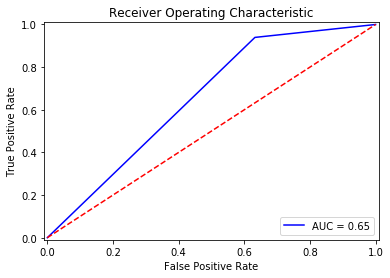

In [152]:
plot_roc_curve(y_test,pred)